# Risk Metrics

In [2]:
# libraries
import pandas as pd
import numpy as np

# must do this in order to have libraries refreshed each time
# this is important when we are developing our own libraries
%load_ext autoreload
%autoreload 2

In [180]:
# importing data frame with unix time stamp from TradingView
data = pd.read_csv(r"C:\Users\colli\Downloads\SP_SPX, 1M.csv", header = 0, index_col = 0)
# Converting unix to date time
data.index = pd.to_datetime(data.index,unit='s')
# only retaining the column of interest
data = data[['close']]
data['returns'] = data['close']/data['close'].shift(1)
data = data.dropna()

### Vol Ratios

In [ ]:
# sharpe.ratio = Return - Risk Free Rate / Volatility 
# crsp.ratio = Return / Volatility

### Volatility

<AxesSubplot:xlabel='time'>

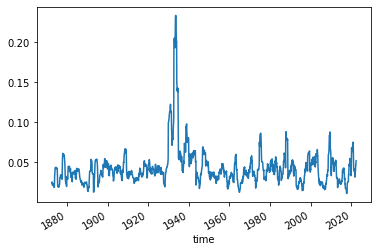

In [127]:
vol = data['returns'].std()
data['rolling.vol'] = data['returns'].rolling(window=12).std()
data['rolling.vol'].plot()
# might be interesting to get this in rolling form to build risk bounds

### Drawdowns

<AxesSubplot:xlabel='time'>

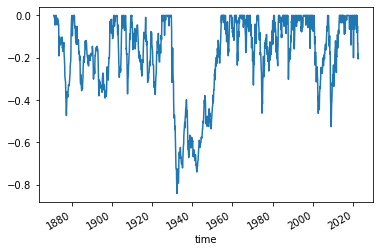

In [128]:
data['wealth.index'] = 1000*data['returns'].cumprod()
data['previous.peaks'] = data['wealth.index'].cummax()
data['drawdown'] = (data['wealth.index']-data['previous.peaks'])/data['previous.peaks']
data['drawdown'].plot()

### Skewness, Kurtosis, Jarque-Bera Test

###### Skewness Formula

$ S(R) = \frac{E[ (R - E(R))^3 ]}{\sigma_R^3} $

###### Kurtosis Formula

$ E(R) = \frac{E[(R-E(R))^4]}{\sigma_R^4} $

###### Jarque-Bera Test

In [186]:
# jarque bera test code
import scipy
from scipy import stats
scipy.stats.jarque_bera(returns)

Jarque_beraResult(statistic=9772.74686350083, pvalue=0.0)

### Downside Volatility

In [153]:
# volatility / std of returns below the mean
# tells us about avg vol below mean, not tail risks
returns = data['returns'].dropna()
returns[returns<1].std(ddof=0)

0.03477775673079247

### Upside Volatility

In [159]:
returns[returns>1].std(ddof=0)

0.0341589578225836

### Up/Down Vol Ratio

In [160]:
returns[returns<1].std(ddof=0) / returns[returns>1].std(ddof=0)

1.0181152748108655

### Value at Risk

Specified confidence interval and time period. 3 typical methods:
- Historic VaR
- Gaussian/Normal Dist. VaR
- Cornish-Fisher VaR

###### Historic VaR

In [157]:
np.percentile(returns, 5) - 1

-0.07167270481814714

In [182]:
import collin_risk as cr
cr.var_historic(data)

close      4.513000
returns    0.928327
dtype: float64

###### Gaussian VaR

In [190]:
# z-score at 5th percentile
z = scipy.stats.norm.ppf(0.05)

In [194]:
# VaR at the 5th percentile
custom_var = returns.mean() + z*returns.std(ddof=0)
traditional_var = 1 - custom_var
traditional_var

0.0745325604034961

###### Cornish-Fisher Expansion

See collin_risk.py for the function.
- Viewed as a nice compromise between model risk and sample risk.
- Do i agree? What risks are present here?

In [204]:
cr.var_cornish_fisher(returns, level = 5)

0.057351651037431894

### Conditional VaR

Computed by finding the average of all returns when worse than level of specified risk.